# CNN

In [1]:
# Tensorflow import

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
# download CIFAR10 dataset

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [5]:
# Normalize pixel valeus to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

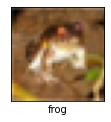

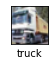

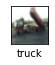

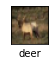

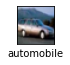

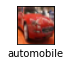

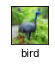

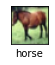

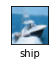

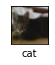

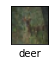

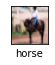

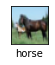

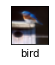

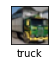

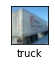

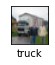

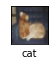

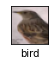

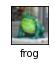

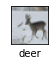

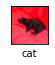

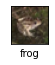

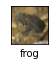

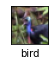

In [7]:
# Verify the data

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dor', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
  plt.show()

In [9]:
# create the convolutional base

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [10]:
# architecture of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [11]:
# add dense layers on top

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [12]:
# architecture of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [14]:
# compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.5355 - accuracy: 0.4364 - val_loss: 1.3504 - val_accuracy: 0.5144
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1856 - accuracy: 0.5799 - val_loss: 1.1259 - val_accuracy: 0.6021
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0308 - accuracy: 0.6376 - val_loss: 1.0090 - val_accuracy: 0.6449
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9306 - accuracy: 0.6733 - val_loss: 0.9856 - val_accuracy: 0.6597
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8541 - accuracy: 0.7029 - val_loss: 0.8874 - val_accuracy: 0.6930
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7975 - accuracy: 0.7217 - val_loss: 0.9043 - val_accuracy: 0.6905
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7439 - accuracy: 0.7391 - val_loss: 0.8761 -

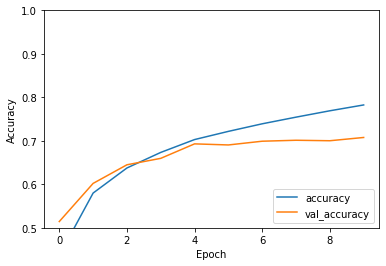

In [16]:
# Evaluate the model

plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

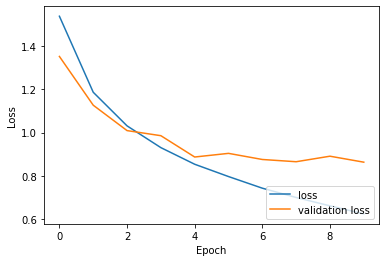

In [18]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 4s - loss: 0.8637 - accuracy: 0.7077


In [23]:
print(test_loss)

0.8636791110038757


In [24]:
print(test_acc)

0.7077000141143799


In [25]:
# padding

import tensorflow as tf

t = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
pad = tf.constant([[1, 1], [1, 1]])
print(t)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)


In [27]:
print(tf.pad(t, pad, "CONSTANT"))

tf.Tensor(
[[0 0 0 0 0]
 [0 1 2 3 0]
 [0 4 5 6 0]
 [0 7 8 9 0]
 [0 0 0 0 0]], shape=(5, 5), dtype=int32)


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

# CNN for MNIST

In [31]:
from keras.datasets import mnist
from matplotlib import pyplot

# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

# summarize dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s'% (testX.shape, testy.shape)) 

11501568/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


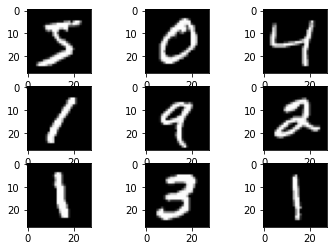

In [32]:
# plot first few images
for i in range(9):
  #define subplot
  pyplot.subplot(330 + 1 + i)
  # plot raw pixel data
  pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))

# show the figure
pyplot.show()

In [ ]:
# record model performance on a validation dataset during training
history = model.fit(..., validation_data=(valX, valY))

In [ ]:
# example of k-fold cv for a neural net
#data = ...

#prerpate cross validation
#kfold = KFold(5, shuffle=True, random_state=1)

# enumerate splits
#for train_ix, test_ix in kfold.split(data):
#  model = ..

In [34]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

#reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [36]:
# one-hot encoding for labels
# one-hot encode target values
from keras.utils.np_utils import to_categorical
trainY = to_categorical(trainY)
testY = to_categorical(testY)

* load train and test dataset

In [37]:
def load_dataset():
  #load dataset
  (trainX, trainY), (testX, testY) = mnist.load_data()

  # reshape dataset to have a single channel
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))

  # one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

* prepare pixel data

In [39]:
# convert from integers to floats
#train_norm = train.astype('float32')
#test_norm = test.astype('float32')

# normalize to range 0-1
#train_norm = train_norm / 255.0
#test_norm = test_norm / 255.0

In [40]:
# scale pixels
def prep_pixels(train, test):
  # convert from integers to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  # normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  # return normalized images
  return train_norm, test_norm

* define CNN  model

In [43]:
def define_model():
  model.Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  #compile model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

* Evaluate Model

In [45]:
# evaluae a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_fold=5):
  scores, histories = list(), list()

  #prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)

  #enumerate splits
  for train_ix, test_ix in kfold.split(dataX):
    #define model
    model = define_model()
    # select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    #fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    #evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # stores scores
    scores.append(acc)
    histories.append(history)
  return scores, histories

* Present results

In [46]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
  for i in range(len(histories)):
    #plot loss
    pyplot.subplot(2, 1, 1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(2, 1, 2)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='blue', lable='train')
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', lable='test')
  pyplot.show()

In [48]:
# summarize model performance
def summarize_performance(scores):
  # print summary
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
  # box and whisker plots of results
  pyplot.boxplot(scores)
  pyplot.show()

* running

In [49]:
# run the test harness for evaluating a model
def run_test_harness():
  #load dataset
  trainX, trainY, testX, testY = load_dataset()
  #prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  #evaluate model
  scores, histories = evaluate_model(trainX, trainY)
  #learning curves
  summarize_diagnostics(histories)
  #summarize estimated performance
  summarize_performance(scores)

* Complete Example

In [53]:
!pip install keras.utils

  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=b1f4acace3d9e0d309408d8561786a0fefc696992483ba3e0ba956ce9293f90e
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


In [56]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

# load train and test dataset
def load_dataset():
  # load dataset
  (trainX, trainY), (testX, testY) = mnist.load_data()
  # reshape dataset to have a single channel
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))
  # one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

In [59]:
# scale pixels
def prep_pixels(train, test):
  # convert from integers to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  # normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  # return normalized images
  return train_norm, test_norm

In [60]:
# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [61]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
  scores, histories = list(), list()
  # prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  # enumerate splits
  for train_ix, test_ix in kfold.split(dataX):
    # define model
    model = define_model()
    # select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # stores scores
    scores.append(acc)
    histories.append(history)
  return scores, histories

In [62]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
  for i in range(len(histories)):
    # plot loss
    pyplot.subplot(2, 1, 1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(2, 1, 2)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  pyplot.show()

In [63]:
# summarize model performance
def summarize_performance(scores):
  # print summary
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
  # box and whisker plots of results
  pyplot.boxplot(scores)
  pyplot.show()

In [64]:
# run the test harness for evaluating a model
def run_test_harness():
  # load dataset
  trainX, trainY, testX, testY = load_dataset()
  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  # evaluate model
  scores, histories = evaluate_model(trainX, trainY)
  # learning curves
  summarize_diagnostics(histories)
  # summarize estimated performance
  summarize_performance(scores)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


> 98.625
> 98.733
> 98.417
> 98.825
> 98.667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


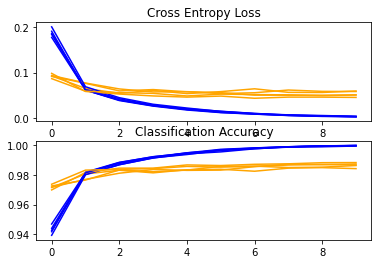

Accuracy: mean=98.653 std=0.136, n=5


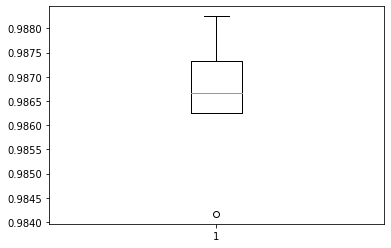

In [65]:
# entry point, run the test harness
run_test_harness()